**Importiere die notwendigen Packages**

In [3]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [4]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bfs_wir_besch_sektor_geschlecht_beschgrad_vzaeq_jahr_od4002

In [5]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bfs_wir_besch_sektor_geschlecht_beschgrad_vzaeq_jahr_OD4002/WIR400OD4002.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [6]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [7]:
data2betested.head(3)

,Jahr,Quartal,stzh_tot,stzh_frau,stzh_mann,stzh_s2,stzh_s3,...,stzh_VZB_s3,zh_tot,zh_s2,zh_s3,ch_tot,ch_s2,ch_s3
0,2003,2,379000,160700,218400,37400,341700,...,218700,830600,145700,685000,4130200,1022500,3107700
1,2003,3,380800,163500,217300,37400,343400,...,219000,835800,145600,690300,4148100,1019800,3128300
2,2003,4,375800,162900,212900,35400,340400,...,219100,828000,142000,686000,4133800,1007900,3125900


In [8]:
data2betested.dtypes

Jahr                int64
Quartal             int64
stzh_tot            int64
stzh_frau           int64
stzh_mann           int64
stzh_s2             int64
stzh_s3             int64
stzh_TZB_tot        int64
stzh_TZB_Frauen     int64
stzh_TZB_Maenner    int64
stzh_TZB_s2         int64
stzh_TZB_s3         int64
stzh_VZA_tot        int64
stzh_VZA_Frauen     int64
stzh_VZA_Maenner    int64
stzh_VZA_s2         int64
stzh_VZA_s3         int64
stzh_VZB_tot        int64
stzh_VZB_Frauen     int64
stzh_VZB_Maenner    int64
stzh_VZB_s2         int64
stzh_VZB_s3         int64
zh_tot              int64
zh_s2               int64
zh_s3               int64
ch_tot              int64
ch_s2               int64
ch_s3               int64
dtype: object

In [9]:
data2betested.shape

(74, 28)

Beschreibe einzelne Attribute

In [10]:
data2betested.describe()

,Jahr,Quartal,stzh_tot,stzh_frau,stzh_mann,stzh_s2,stzh_s3,...,stzh_VZB_s3,zh_tot,zh_s2,zh_s3,ch_tot,ch_s2,ch_s3
count,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74
mean,2012,2,433328,195957,237361,30446,402888,...,242061,941914,143005,798918,4685282,1072145,3613130
std,5,1,36752,21788,15132,1872,38110,...,14562,68816,3576,70176,326582,29206,304482
min,2003,1,372100,160700,210200,27800,339900,...,213100,823900,135600,684000,4130200,999300,3107700
25%,2007,2,407175,180000,227175,29200,377200,...,234175,896275,140250,749625,4483650,1066025,3397425
50%,2012,2,438700,197500,240350,30300,408250,...,245500,950150,144300,805150,4720750,1082350,3635700
75%,2017,3,457875,209650,248250,30975,429050,...,252425,990550,145950,849875,4941700,1089925,3867725
max,2021,4,496100,236700,260200,37400,467600,...,265000,1054000,148100,915300,5213100,1113800,4114500


Wie viele Nullwerte gibt es im Datensatz?

In [11]:
data2betested.isnull().sum()

Jahr                0
Quartal             0
stzh_tot            0
stzh_frau           0
stzh_mann           0
stzh_s2             0
stzh_s3             0
stzh_TZB_tot        0
stzh_TZB_Frauen     0
stzh_TZB_Maenner    0
stzh_TZB_s2         0
stzh_TZB_s3         0
stzh_VZA_tot        0
stzh_VZA_Frauen     0
stzh_VZA_Maenner    0
stzh_VZA_s2         0
stzh_VZA_s3         0
stzh_VZB_tot        0
stzh_VZB_Frauen     0
stzh_VZB_Maenner    0
stzh_VZB_s2         0
stzh_VZB_s3         0
zh_tot              0
zh_s2               0
zh_s3               0
ch_tot              0
ch_s2               0
ch_s3               0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [12]:
data2betested['Jahr']=pd.to_datetime(data2betested['Jahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,Jahr,Quartal,stzh_tot,stzh_frau,stzh_mann,stzh_s2,stzh_s3,...,stzh_VZB_s3,zh_tot,zh_s2,zh_s3,ch_tot,ch_s2,ch_s3
0,2003-01-01,2,379000,160700,218400,37400,341700,...,218700,830600,145700,685000,4130200,1022500,3107700
1,2003-01-01,3,380800,163500,217300,37400,343400,...,219000,835800,145600,690300,4148100,1019800,3128300
2,2003-01-01,4,375800,162900,212900,35400,340400,...,219100,828000,142000,686000,4133800,1007900,3125900
3,2004-01-01,1,378300,165500,212800,34300,344000,...,219100,829600,141400,688200,4130900,999300,3131600
4,2004-01-01,2,375300,163500,211800,34200,341200,...,217400,832900,141000,691900,4156100,1006100,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2020-01-01,3,491000,230800,260200,28400,462500,...,259400,1048900,139100,909800,5138000,1096900,4041100
70,2020-01-01,4,486900,230200,256700,28200,458600,...,261300,1037800,137200,900600,5141300,1084700,4056600
71,2021-01-01,1,480900,227600,253300,28400,452500,...,260000,1027600,136100,891500,5101200,1077000,4024300
72,2021-01-01,2,489100,233700,255400,27800,461400,...,261200,1039000,135600,903400,5126100,1082800,4043300


Bereite die Daten für die Grafik unten vor

In [13]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)

19

In [14]:
for key, group in Jahre:
    print(key, len(group))

2003-01-01 00:00:00 3
2004-01-01 00:00:00 4
2005-01-01 00:00:00 4
2006-01-01 00:00:00 4
2007-01-01 00:00:00 4
2008-01-01 00:00:00 4
2009-01-01 00:00:00 4
2010-01-01 00:00:00 4
2011-01-01 00:00:00 4
2012-01-01 00:00:00 4
2013-01-01 00:00:00 4
2014-01-01 00:00:00 4
2015-01-01 00:00:00 4
2016-01-01 00:00:00 4
2017-01-01 00:00:00 4
2018-01-01 00:00:00 4
2019-01-01 00:00:00 4
2020-01-01 00:00:00 4
2021-01-01 00:00:00 3


In [16]:
myJahr = "2021-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,Jahr,Quartal,stzh_tot,stzh_frau,stzh_mann,stzh_s2,stzh_s3,...,stzh_VZB_s3,zh_tot,zh_s2,zh_s3,ch_tot,ch_s2,ch_s3
71,2021-01-01,1,480900,227600,253300,28400,452500,...,260000,1027600,136100,891500,5101200,1077000,4024300
72,2021-01-01,2,489100,233700,255400,27800,461400,...,261200,1039000,135600,903400,5126100,1082800,4043300
73,2021-01-01,3,496100,236700,259400,28600,467600,...,265000,1054000,138700,915300,5213100,1098700,4114500


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [17]:
test = data2betested.groupby(['Quartal'])[['stzh_frau']].agg('median')
test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

,stzh_frau
Quartal,
1,197650
2,195500
3,199500
4,196000


**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [18]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [19]:
#mySelection = aktuellesJahr[(aktuellesJahr.KreisSort<2) & (aktuellesJahr.KonOGDSort==1)]
mySelection = data2betested[['Jahr', 'Quartal', 'stzh_tot', 'stzh_s2']]
selVZA = data2betested[['Jahr', 'Quartal', 'stzh_VZA_Frauen', 'stzh_VZA_Maenner', 'stzh_VZA_s2', 'stzh_VZA_s3']]

selVZA.head()


,Jahr,Quartal,stzh_VZA_Frauen,stzh_VZA_Maenner,stzh_VZA_s2,stzh_VZA_s3
0,2003-01-01,2,109200,186200,34200,261300
1,2003-01-01,3,111300,185600,34200,262800
2,2003-01-01,4,111900,182000,32500,261400
3,2004-01-01,1,112500,181700,31500,262700
4,2004-01-01,2,111200,181000,31400,260800


In [20]:
myGraph = data2betested[['Jahr', 'Quartal', 'stzh_VZA_Frauen', 'stzh_VZA_Maenner', 'stzh_VZA_s2', 'stzh_VZA_s3']]
myGraph

,Jahr,Quartal,stzh_VZA_Frauen,stzh_VZA_Maenner,stzh_VZA_s2,stzh_VZA_s3
0,2003-01-01,2,109200,186200,34200,261300
1,2003-01-01,3,111300,185600,34200,262800
2,2003-01-01,4,111900,182000,32500,261400
3,2004-01-01,1,112500,181700,31500,262700
4,2004-01-01,2,111200,181000,31400,260800
...,...,...,...,...,...,...
69,2020-01-01,3,155500,219500,26400,348600
70,2020-01-01,4,157200,218500,26000,349700
71,2021-01-01,1,157400,216500,26400,347500
72,2021-01-01,2,159000,217300,25700,350700


In [21]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['Quartal'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(selVZA).encode(
    x='Jahr',
    y='stzh_VZA_Frauen',
    color='Quartal'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [22]:
alt.Chart(selVZA).mark_circle(size=60).encode(
    x='Jahr',
    y='stzh_VZA_Frauen',
    color='Quartal',
    tooltip=['Jahr','Quartal','stzh_VZA_Frauen']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

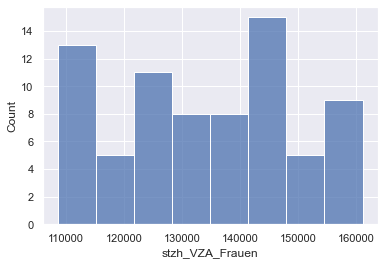

In [23]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=selVZA, x="stzh_VZA_Frauen") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [24]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html